In [141]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [142]:
df = pd.read_csv('individuals-using-the-internet.csv')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seriesID           4906 non-null   int64  
 1   seriesCode         4906 non-null   object 
 2   seriesName         4906 non-null   object 
 3   seriesParent       0 non-null      float64
 4   seriesUnits        4906 non-null   object 
 5   entityID           4906 non-null   int64  
 6   entityIso          4906 non-null   object 
 7   entityName         4906 non-null   object 
 8   dataValue          4906 non-null   float64
 9   dataYear           4906 non-null   int64  
 10  dataNote           612 non-null    object 
 11  dataSource         4449 non-null   object 
 12  seriesDescription  4906 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 498.4+ KB


In [144]:
df = df.drop(columns=[
    'seriesID',
    'seriesCode',
    'seriesName',
    'seriesParent',
    'seriesUnits',
    'entityID',
    'entityIso',
    'dataNote',
    'dataSource',
    'seriesDescription'
])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   entityName  4906 non-null   object 
 1   dataValue   4906 non-null   float64
 2   dataYear    4906 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 115.1+ KB


In [146]:
df = df.rename(columns={
    'entityName': 'Country',
    'dataValue': 'Value',
    'dataYear': 'Year'
})

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4906 non-null   object 
 1   Value    4906 non-null   float64
 2   Year     4906 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 115.1+ KB


In [148]:
df_filtered = df.query('Country == "Brazil"')

In [149]:
df_sorted = df_filtered.sort_values(by='Year', ascending=False).reset_index(drop=True)
df_sorted

,Country,Value,Year
0,Brazil,84.15060,2023
1,Brazil,80.52780,2022
2,Brazil,80.68990,2021
3,Brazil,81.34270,2020
4,Brazil,73.91240,2019
5,Brazil,70.43430,2018
6,Brazil,67.47130,2017
7,Brazil,60.87250,2016
8,Brazil,58.32800,2015
9,Brazil,54.55100,2014


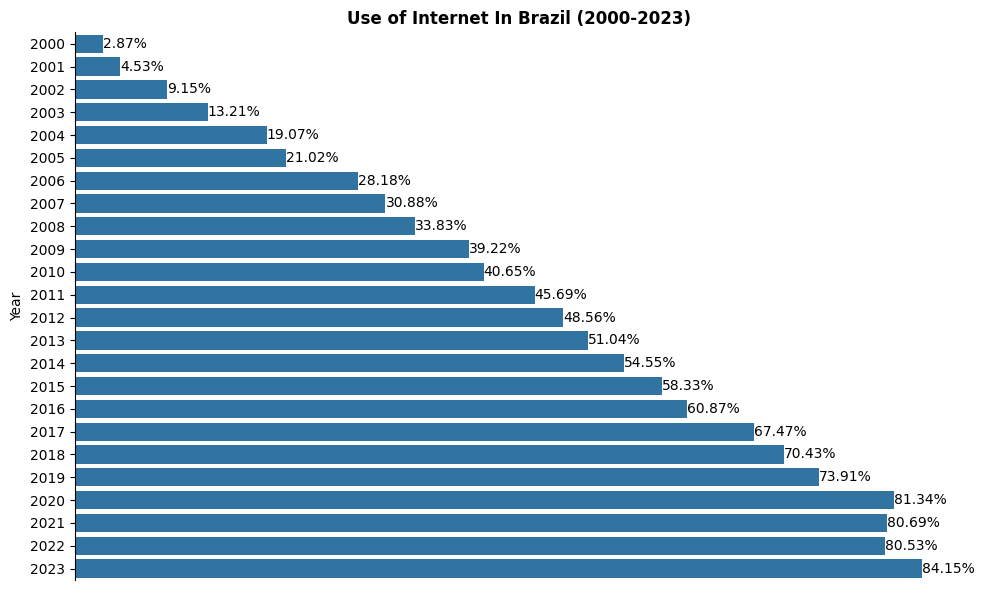

In [150]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_sorted, y='Year', x='Value', orient='h')

ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.set_title('Use of Internet In Brazil (2000-2023)', fontweight='bold')
sns.despine(bottom=True)
ax.xaxis.set_visible(False)
plt.tight_layout()
plt.show()